# 👨‍🌾 Pendahuluan

Penanaman pendamping dalam berkebun dan pertanian adalah penanaman berbagai tanaman secara berdekatan untuk berbagai alasan, termasuk pengendalian hama, penyerbukan, menyediakan habitat bagi serangga bermanfaat, memaksimalkan penggunaan ruang, dan untuk meningkatkan produktivitas tanaman. Penanaman pendamping merupakan salah satu bentuk polikultur.

Penanaman pendamping digunakan oleh petani dan tukang kebun di negara-negara industri maupun negara berkembang karena berbagai alasan. Banyak prinsip modern penanaman pendamping telah ada berabad-abad yang lalu di kebun hutan di Asia, dan ribuan tahun yang lalu di Mesoamerika.

Fitur (Input):

Source Node - nama tanaman tempat tautan dimulai
Destination Node - nama pabrik tempat tautan berakhir
Source Property - kelas untuk node sumber (sayuran, rempah-rempah, bunga, buah-buahan)

Label (Output):

Link - tipe tautan (membantu, dibantu oleh, hindari)

# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics 
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# Read Data

In [2]:
df_tanaman_pendamping = pd.read_csv("Dataset/companion_plants.csv")
df_tanaman_pendamping


,Source Node,Link,Destination Node,Source Type
0,bawang-bawangan,membantu,pohon buah-buahan,sayuran
1,bawang-bawangan,membantu,sayuran nabati,sayuran
2,bawang-bawangan,membantu,tomat,sayuran
3,bawang-bawangan,membantu,cabai,sayuran
4,bawang-bawangan,membantu,paprika,sayuran
...,...,...,...,...
999,selada air,membantu,zucchini,bunga
1000,adas,hindari,tomato,herbal
1001,bunga matahari,membantu,timun,bunga
1002,Kamomil,membantu,kubis,herbal


In [3]:
df_tanaman_pendamping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Source Node       1004 non-null   object
 1   Link              1004 non-null   object
 2   Destination Node  1004 non-null   object
 3   Source Type       1004 non-null   object
dtypes: object(4)
memory usage: 31.5+ KB


In [4]:
df_tanaman_pendamping['Link'].value_counts()

Link
membantu        458
dibantu_oleh    416
hindari         130
Name: count, dtype: int64

# Independent (X) & Dependent (Y) Variable

In [5]:
X = df_tanaman_pendamping.loc[:, ['Source Node', 'Destination Node', 'Source Type']]
y = df_tanaman_pendamping.loc[:, 'Link']

X

,Source Node,Destination Node,Source Type
0,bawang-bawangan,pohon buah-buahan,sayuran
1,bawang-bawangan,sayuran nabati,sayuran
2,bawang-bawangan,tomat,sayuran
3,bawang-bawangan,cabai,sayuran
4,bawang-bawangan,paprika,sayuran
...,...,...,...
999,selada air,zucchini,bunga
1000,adas,tomato,herbal
1001,bunga matahari,timun,bunga
1002,Kamomil,kubis,herbal


In [6]:
y

0       membantu
1       membantu
2       membantu
3       membantu
4       membantu
          ...   
999     membantu
1000     hindari
1001    membantu
1002    membantu
1003     hindari
Name: Link, Length: 1004, dtype: object

# Split Train Test

In [7]:
x_train, x_test, y_train, y_test = train_test_split (X,
                                                     y, 
                                                     test_size=0.2, 
                                                     random_state=13)

# Create Model (Catboost) & Training

In [8]:
cat_features = ['Source Node', 'Destination Node', 'Source Type']

CB_Model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    loss_function="MultiClass",
    eval_metric="Accuracy",
    random_seed=0,
    verbose=100
)

In [9]:
CB_Model.fit(
    x_train,
    y_train,
    cat_features=cat_features,
    eval_set=(x_test, y_test),
    early_stopping_rounds=50
)

0:	learn: 0.6612702	test: 0.7562189	best: 0.7562189 (0)	total: 171ms	remaining: 1m 25s
100:	learn: 0.8007472	test: 0.8557214	best: 0.8606965 (58)	total: 1.59s	remaining: 6.3s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.8606965174
bestIteration = 58

Shrink model to first 59 iterations.


# Testing Model

In [10]:
y_predict = CB_Model.predict(x_test)
y_predict

array([['membantu'],
       ['membantu'],
       ['membantu'],
       ['membantu'],
       ['membantu'],
       ['membantu'],
       ['membantu'],
       ['dibantu_oleh'],
       ['membantu'],
       ['membantu'],
       ['dibantu_oleh'],
       ['dibantu_oleh'],
       ['membantu'],
       ['membantu'],
       ['dibantu_oleh'],
       ['dibantu_oleh'],
       ['membantu'],
       ['membantu'],
       ['membantu'],
       ['membantu'],
       ['dibantu_oleh'],
       ['dibantu_oleh'],
       ['dibantu_oleh'],
       ['membantu'],
       ['dibantu_oleh'],
       ['membantu'],
       ['dibantu_oleh'],
       ['membantu'],
       ['dibantu_oleh'],
       ['dibantu_oleh'],
       ['dibantu_oleh'],
       ['dibantu_oleh'],
       ['dibantu_oleh'],
       ['dibantu_oleh'],
       ['dibantu_oleh'],
       ['dibantu_oleh'],
       ['membantu'],
       ['membantu'],
       ['dibantu_oleh'],
       ['dibantu_oleh'],
       ['membantu'],
       ['membantu'],
       ['dibantu_oleh'],
       ['diba

# Evaluasi Model


Test Accuracy : 0.8606965174129353

Classification Report :
               precision    recall  f1-score   support

dibantu_oleh       0.85      0.94      0.89        89
     hindari       0.67      0.11      0.19        18
    membantu       0.88      0.93      0.90        94

    accuracy                           0.86       201
   macro avg       0.80      0.66      0.66       201
weighted avg       0.85      0.86      0.83       201



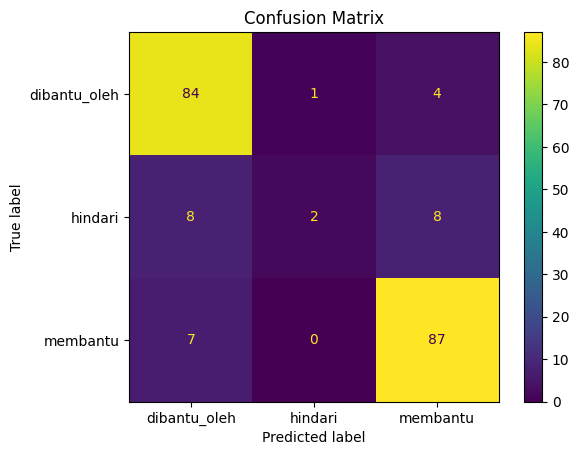

In [11]:
print("\nTest Accuracy :", metrics.accuracy_score(y_test, y_predict))

print("\nClassification Report :\n",
      metrics.classification_report(y_test, y_predict, zero_division=True))

ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.title("Confusion Matrix")
plt.show()

# Visualisasi Data

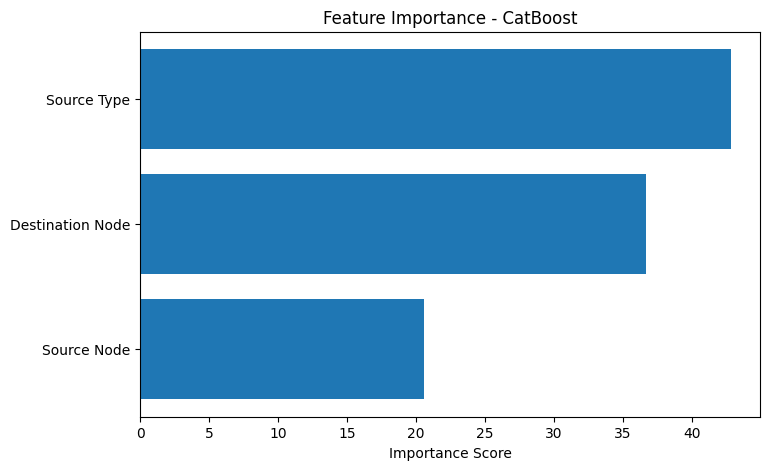

In [12]:
feature_importance = CB_Model.get_feature_importance()

importance_df = pd.DataFrame({
    "Feature": x_train.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 5))
plt.barh(
    importance_df["Feature"],
    importance_df["Importance"]
)

plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Feature Importance - CatBoost")
plt.show()

# Test New Data

In [13]:
input_data = pd.DataFrame([{
    'Source Node': 'Jagung',
    'Destination Node': 'Kentang',
    'Source Type': 'Sayuran'
}])

predict_data = CB_Model.predict(input_data)
print("Hasil Prediksi : ", predict_data)

Hasil Prediksi :  [['dibantu_oleh']]


# Save Model & Deploy 

In [14]:
# import pickle

# with open("Model/CB_TanamanPendamping_model.pkl", "wb") as f:
#      pickle.dump(CB_Model, f)

# print("Model Catboost berhasil disimpan dengan format .pkl")